# MobileNetV2 with Kaggle data: 10 epochs and 150x150 resolution

For an example, see [here](https://www.kaggle.com/code/vencerlanz09/bird-classification-using-cnn-mobilenetv2)

In [13]:
import pathlib, os, random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import time
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential

## 1. Look at data

In [3]:
# get current absolute path of parent folder of this file
path = os.path.dirname(os.path.abspath('3_MobileNetV2_Kaggle'))

# set paths to train, test and validation folder
train_dir = path + '/data/data_2/train/'
test_dir = path + '/data/data_2/test/'
val_dir = path + '/data/data_2/valid/'

In [4]:
# print the names of the subfolder (i.e. classes) within train folder
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # creating a list of class names from subdirectory 
print(class_names)

['.DS_Store' 'ABBOTTS BABBLER' 'ABBOTTS BOOBY'
 'ABYSSINIAN GROUND HORNBILL' 'AFRICAN CROWNED CRANE'
 'AFRICAN EMERALD CUCKOO' 'AFRICAN FIREFINCH' 'AFRICAN OYSTER CATCHER'
 'AFRICAN PIED HORNBILL' 'ALBATROSS' 'ALBERTS TOWHEE'
 'ALEXANDRINE PARAKEET' 'ALPINE CHOUGH' 'ALTAMIRA YELLOWTHROAT'
 'AMERICAN AVOCET' 'AMERICAN BITTERN' 'AMERICAN COOT' 'AMERICAN FLAMINGO'
 'AMERICAN GOLDFINCH' 'AMERICAN KESTREL' 'AMERICAN PIPIT'
 'AMERICAN REDSTART' 'AMERICAN WIGEON' 'AMETHYST WOODSTAR' 'ANDEAN GOOSE'
 'ANDEAN LAPWING' 'ANDEAN SISKIN' 'ANHINGA' 'ANIANIAU' 'ANNAS HUMMINGBIRD'
 'ANTBIRD' 'ANTILLEAN EUPHONIA' 'APAPANE' 'APOSTLEBIRD' 'ARARIPE MANAKIN'
 'ASHY STORM PETREL' 'ASHY THRUSHBIRD' 'ASIAN CRESTED IBIS'
 'ASIAN DOLLARD BIRD' 'AUCKLAND SHAQ' 'AUSTRAL CANASTERO'
 'AUSTRALASIAN FIGBIRD' 'AVADAVAT' 'AZARAS SPINETAIL'
 'AZURE BREASTED PITTA' 'AZURE JAY' 'AZURE TANAGER' 'AZURE TIT'
 'BAIKAL TEAL' 'BALD EAGLE' 'BALD IBIS' 'BALI STARLING' 'BALTIMORE ORIOLE'
 'BANANAQUIT' 'BAND TAILED GUAN' 'BANDED BRO

Define a helper function to randomly show one image:

In [5]:
def view_random_image(target_dir, target_class):
  # setting up the image directory
  target_folder = target_dir + target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #read image and plotting it
  img = mpimg.imread(target_folder + "/" + random_image[0] )
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  
  return img

Apply the visualization function to one example:

Image shape: (224, 224, 3)


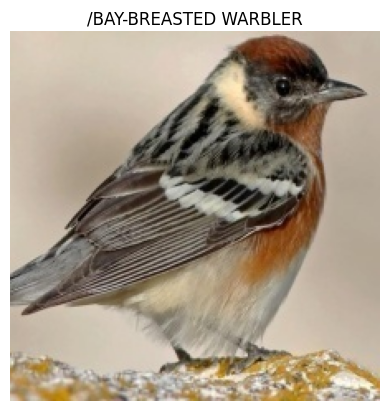

In [6]:
img = view_random_image(target_dir = train_dir,
                        target_class = '/BAY-BREASTED WARBLER'
                        ) # or we can write nike instead of converse to see converse examples

In [7]:
# get shape of image (width, height, colour channels)
img.shape

(224, 224, 3)

Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)


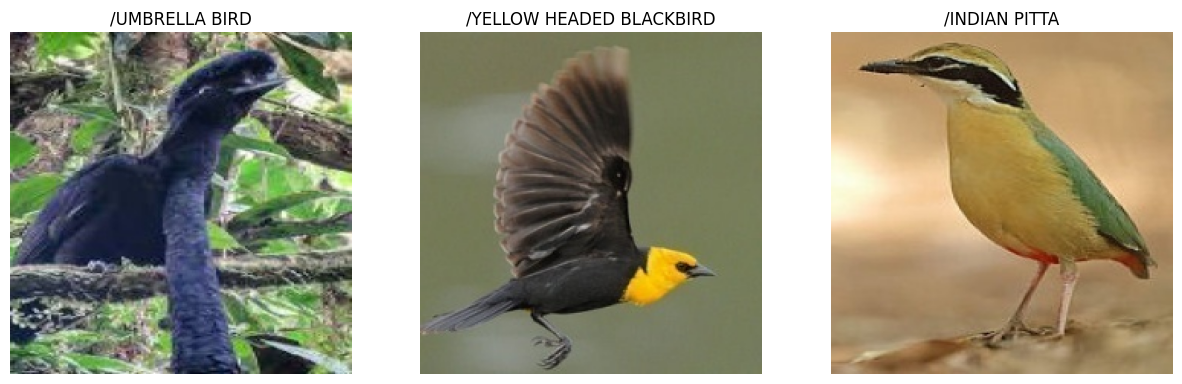

In [8]:
plt.figure(figsize = (15,7))
plt.subplot(1,3,1)
steak_image = view_random_image(train_dir, "/UMBRELLA BIRD")
plt.subplot(1,3,2)
pizza_image = view_random_image(train_dir, "/YELLOW HEADED BLACKBIRD")
plt.subplot(1,3,3)
pizza_image = view_random_image(train_dir, "/INDIAN PITTA")

## 2. Data Preprocessing

In [9]:
# Normalize images
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# data transfer from directories to batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size= 32,
                                               target_size= (300,300),
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (300,300),
                                               class_mode = "categorical")

val_data = valid_datagen.flow_from_directory(directory = val_dir,
                                               batch_size = 32,
                                               target_size = (300,300),
                                               class_mode = "categorical")


Found 70626 images belonging to 450 classes.
Found 2250 images belonging to 450 classes.
Found 2250 images belonging to 450 classes.


## 3.Creating and fitting the Model

In [10]:
img_height = 150
img_width = 150
epoch_num = 10

In [11]:
# 1. Create a base model with tf.keras.applications
base_model = tf.keras.applications.MobileNetV2(include_top= False,)

# 2. Freeze the base model
base_model.trainable = False

#3. Create inputs into models
inputs = tf.keras.layers.Input(shape =(img_height,img_width,3), name = "input-layer")

#4. Rescaling
x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

#5. Pass the inputs 
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

#7. Create the output activation layer
outputs = tf.keras.layers.Dense(450, activation = "softmax", name = "output-layer")(x)

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-10-27 12:28:11.575400: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-27 12:28:11.576963: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


9420800/9406464 [==============================] - 1s 0us/step
Shape after passing inputs through base model: (None, 4, 4, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)


In [12]:
# 8. Combine the inputs with outputs into a model
model_p150_e10 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_p150_e10.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.03),
                metrics = ["accuracy"])


In [14]:
# fit model and measure time
st = time.time()
history = model_p150_e10.fit(train_data,
                                 epochs=epoch_num,
                                 steps_per_epoch = len(train_data),
                                 validation_data = val_data,
                                 validation_steps = int(0.25*len(val_data)),)

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Epoch 1/10


2022-10-27 12:31:33.503122: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-27 12:31:34.722550: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2208/2208 [==============================] - ETA: 0s - loss: 12.7730 - accuracy: 0.5051

2022-10-27 12:40:15.129676: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2208/2208 [==============================] - 526s 236ms/step - loss: 12.7730 - accuracy: 0.5051 - val_loss: 7.0640 - val_accuracy: 0.6949
Epoch 2/10
2208/2208 [==============================] - 581s 263ms/step - loss: 8.0967 - accuracy: 0.7211 - val_loss: 5.9864 - val_accuracy: 0.7647
Epoch 3/10
2208/2208 [==============================] - 652s 296ms/step - loss: 6.4994 - accuracy: 0.7858 - val_loss: 9.0905 - val_accuracy: 0.7500
Epoch 4/10
2208/2208 [==============================] - 709s 321ms/step - loss: 5.5061 - accuracy: 0.8242 - val_loss: 6.4268 - val_accuracy: 0.8309
Epoch 5/10
2208/2208 [==============================] - 746s 338ms/step - loss: 4.4061 - accuracy: 0.8552 - val_loss: 6.8389 - val_accuracy: 0.8235
Epoch 6/10
2208/2208 [==============================] - 891s 403ms/step - loss: 3.8828 - accuracy: 0.8755 - val_loss: 7.6503 - val_accuracy: 0.8364
Epoch 7/10
2208/2208 [==============================] - 936s 424ms/step - loss: 3.3633 - accuracy: 0.8909 - val_loss: 7.00

Runtime info: One epoch with the MobileNetV2 takes roughly 13 minutes - total runtime: 130 minutes (~2hrs)

In [15]:
model_p150_e10.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input-layer (InputLayer)    [(None, 150, 150, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, None, None, 1280)  2257984  
 ional)                                                          
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output-layer (Dense)        (None, 450)               576450    
                                                                 
Total params: 2,834,434
Trainable params: 576,450
Non-trainable params: 2,257,984
_________________________________________________________________


In [16]:
model_p150_e10.evaluate(test_data)

71/71 [==============================] - 17s 233ms/step - loss: 6.8016 - accuracy: 0.8600


[6.80161190032959, 0.8600000143051147]

In [18]:
def plot_loss_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure() 
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

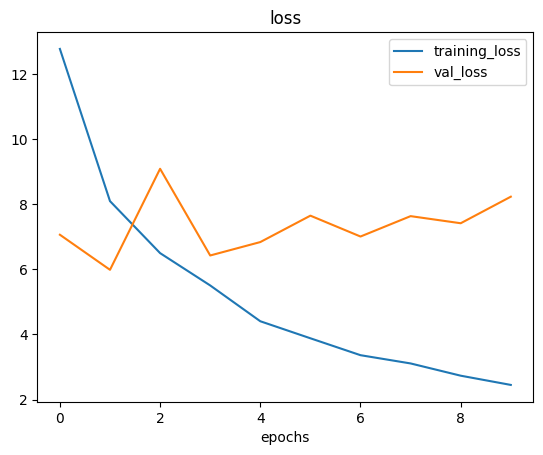

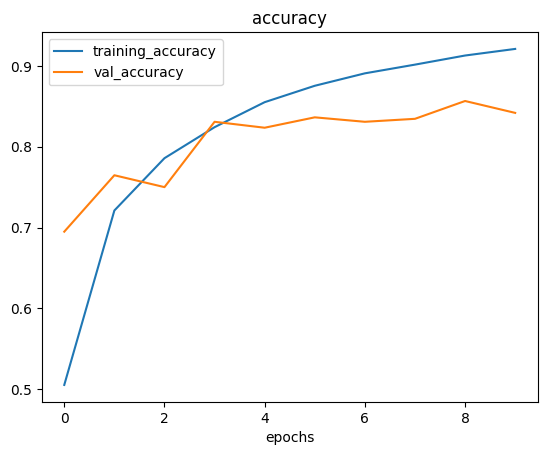

In [19]:
plot_loss_curves(history)

## 4. Freeze top layers of Base Model

In [20]:
# To begin fine-tuning lets start by setting the last 10 layers as trainable
base_model.trainable = True

# Un-freeze last 10 layers
for layer in base_model.layers[:-10]:
  layer.trainable = False

# Recompile (we have to compile model every time there is a change)
model_p150_e10.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), # when fine-tuning you typically want to lower lr by 10x
                 metrics = ["accuracy"] )

In [21]:
# Check which layers are trainable
for layer_number, layer in enumerate(model_p150_e10.layers[1].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 Conv1 False
2 bn_Conv1 False
3 Conv1_relu False
4 expanded_conv_depthwise False
5 expanded_conv_depthwise_BN False
6 expanded_conv_depthwise_relu False
7 expanded_conv_project False
8 expanded_conv_project_BN False
9 block_1_expand False
10 block_1_expand_BN False
11 block_1_expand_relu False
12 block_1_pad False
13 block_1_depthwise False
14 block_1_depthwise_BN False
15 block_1_depthwise_relu False
16 block_1_project False
17 block_1_project_BN False
18 block_2_expand False
19 block_2_expand_BN False
20 block_2_expand_relu False
21 block_2_depthwise False
22 block_2_depthwise_BN False
23 block_2_depthwise_relu False
24 block_2_project False
25 block_2_project_BN False
26 block_2_add False
27 block_3_expand False
28 block_3_expand_BN False
29 block_3_expand_relu False
30 block_3_pad False
31 block_3_depthwise False
32 block_3_depthwise_BN False
33 block_3_depthwise_relu False
34 block_3_project False
35 block_3_project_BN False
36 block_4_expand False
37 block_4_expa

In [22]:
# Now we have unfrozen some of the layers on the top 
print(len(model_p150_e10.trainable_variables))

13


In [23]:
# Save the entire small model as a SavedModel.
!mkdir -p saved_model
model_p150_e10.save('saved_model/MobileNetV2_Kaggle_p150_e10')

2022-10-27 14:58:13.146094: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: saved_model/MobileNetV2_Kaggle_p150_e10/assets


INFO:tensorflow:Assets written to: saved_model/MobileNetV2_Kaggle_p150_e10/assets


## 5. Fine-Tuning and Refitting

In [21]:
fine_tune_epochs = epoch_num + 1

# Refit the model
history_2 = model_p150_e10.fit(train_data,
                       epochs = fine_tune_epochs,
                       validation_data = val_data,
                       validation_steps = int(0.25*len(val_data)),
                       initial_epoch =  history.epoch[-1],) # Start the epoch where it left before

Epoch 10/11


2022-10-27 02:06:56.683668: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2208/2208 [==============================] - ETA: 0s - loss: 0.8143 - accuracy: 0.9691

2022-10-27 02:24:03.311806: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2208/2208 [==============================] - 1040s 466ms/step - loss: 0.8143 - accuracy: 0.9691 - val_loss: 3.2977 - val_accuracy: 0.9265
Epoch 11/11
2208/2208 [==============================] - 1262s 572ms/step - loss: 0.3525 - accuracy: 0.9829 - val_loss: 3.1020 - val_accuracy: 0.9301


In [22]:
model_p150_e10.evaluate(test_data)

71/71 [==============================] - 34s 468ms/step - loss: 2.2628 - accuracy: 0.9400


[2.2627923488616943, 0.9399999976158142]

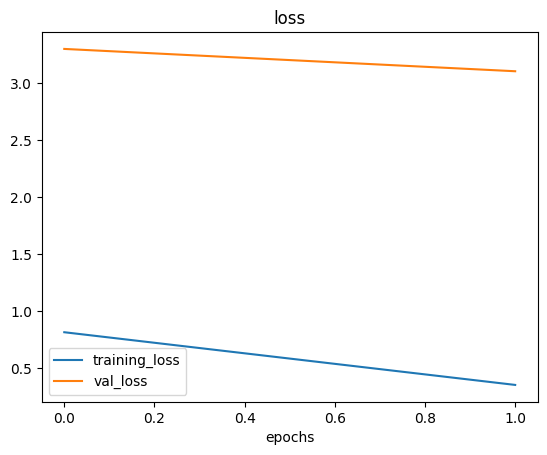

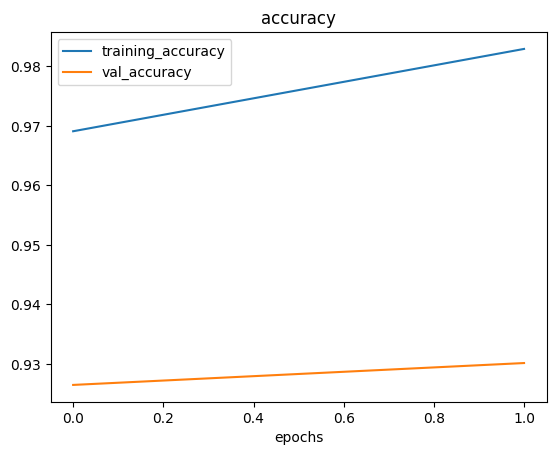

In [23]:
plot_loss_curves(history_2)

## 6. Making some predictions

In [24]:
# cReating a function that preprocess the custom data
def load_and_prep_image(filename, img_shape = img_height):
  img = tf.io.read_file(filename) #read image
  img = tf.image.decode_image(img) # decode the image to a tensor
  img = tf.image.resize(img, size = [img_shape, img_shape]) # resize the image
  img = img/255. # rescale the image
  return img

In [25]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

Add new files to the test folder 

In [26]:
amsel = "/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/images to test/Amsel.jpeg"
blaumeise = "/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/images to test/blaumeise.jpeg"
buchfink = "/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/images to test/buchfink.jpeg"
elster = "/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/images to test/elster.jpeg"
feldsperling = "/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/images to test/feldsperling.jpeg"
firefinch = "/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/images to test/firefinch.jpg"
gruenfink = "/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/images to test/grünfink.jpeg"
haussperling = "/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/images to test/haussperling.jpeg"
kohlmeise = "/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/images to test/Kohlmeise.jpeg"
mauersegler = "/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/images to test/mauersegler.jpeg"
mehlschwalbe = "/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/images to test/mehlschwalbe.jpeg"
rotkehlchen = "/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/images to test/Rotkehlchen.jpeg"
star = "/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/images to test/Star.jpeg"

2022-10-27 02:50:53.917462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


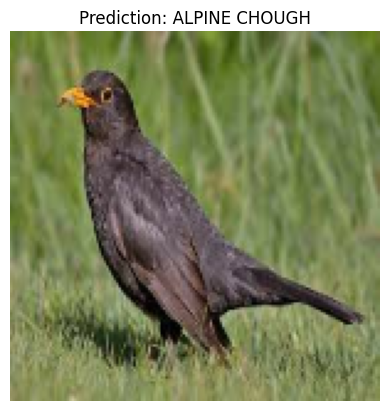

In [27]:
# amsel
pred_and_plot(model_p150_e10,amsel, class_names)

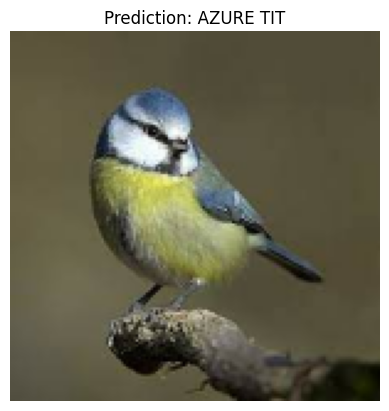

In [28]:
#blaumeise
pred_and_plot(model_p150_e10,blaumeise, class_names)

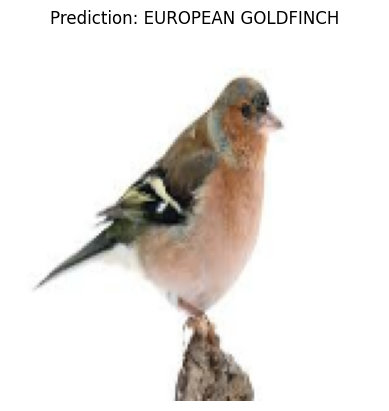

In [29]:
#buchfink
pred_and_plot(model_p150_e10,buchfink, class_names)

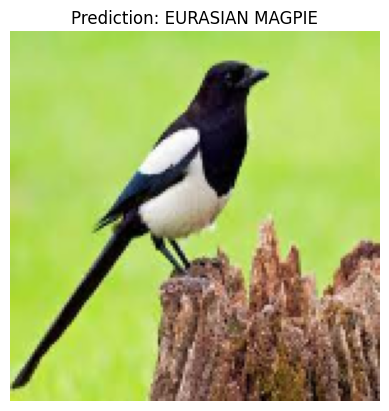

In [30]:
#elster
pred_and_plot(model_p150_e10,elster, class_names)

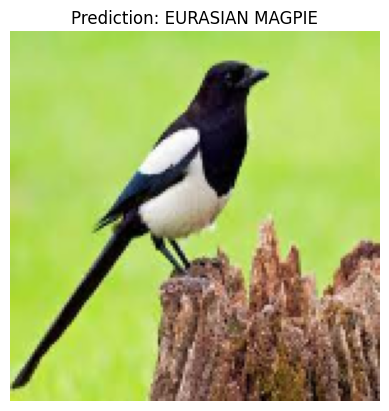

In [31]:
#elster
pred_and_plot(model_p150_e10,elster, class_names)

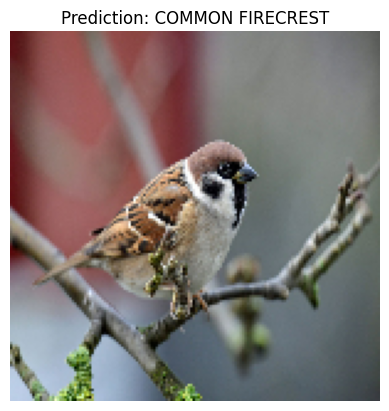

In [32]:
#feldsperling
pred_and_plot(model_p150_e10,feldsperling, class_names)

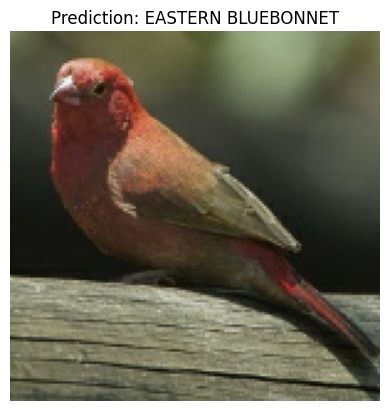

In [33]:
#firefinch
pred_and_plot(model_p150_e10,firefinch, class_names)

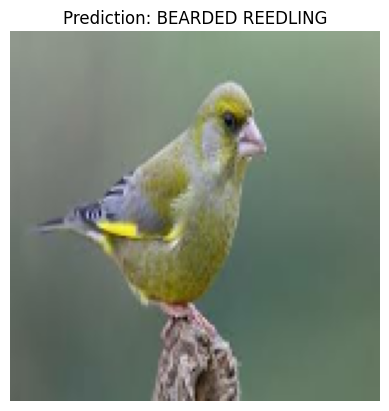

In [34]:
#gruenfink
pred_and_plot(model_p150_e10,gruenfink, class_names)

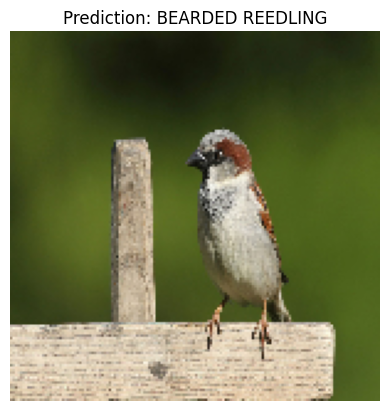

In [35]:
#haussperling
pred_and_plot(model_p150_e10,haussperling, class_names)

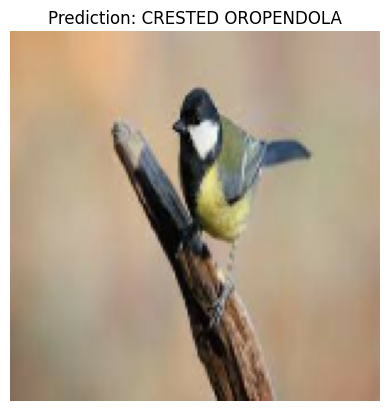

In [36]:
#kohlmeise
pred_and_plot(model_p150_e10,kohlmeise, class_names)

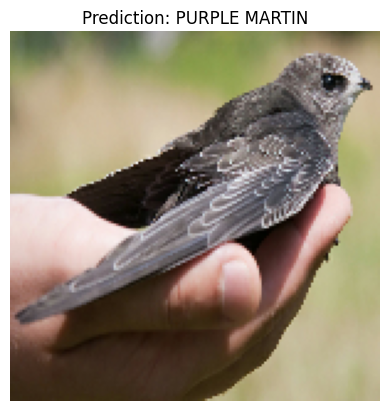

In [37]:
#mauersegler
pred_and_plot(model_p150_e10,mauersegler, class_names)

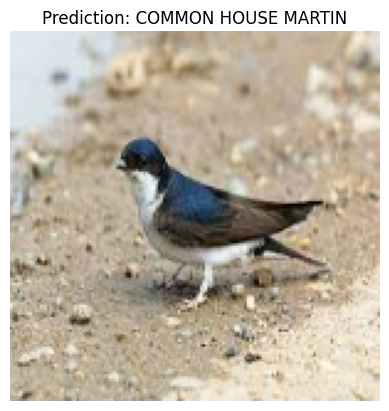

In [38]:
#mehlschwalbe
pred_and_plot(model_p150_e10,mehlschwalbe, class_names)

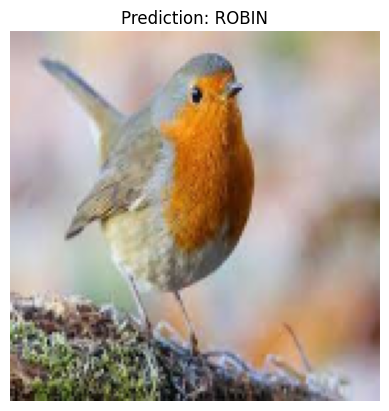

In [39]:
# rotkehlchen
pred_and_plot(model_p150_e10,rotkehlchen, class_names)

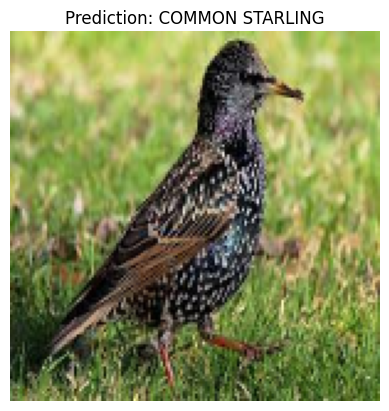

In [40]:
# star
pred_and_plot(model_p150_e10,star, class_names)